In [1026]:
pip install pyforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1027]:
import pyforest

In [1028]:
dataset=pd.read_csv("/content/Loan Prediction Dataset.csv")

<IPython.core.display.Javascript object>

In [1029]:
dataset.shape

(614, 13)

In [1030]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [1031]:
dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [1032]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [1033]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [1034]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [1035]:
dataset=dataset.drop(["Loan_ID"],axis=1)

In [1036]:
dataset["Loan_Status"]=np.where(dataset["Loan_Status"]=="Y",1,0)

<IPython.core.display.Javascript object>

In [1037]:
for i in dataset.columns:
  dataset[i+"new"]=np.where(dataset[i].isnull(),1,0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

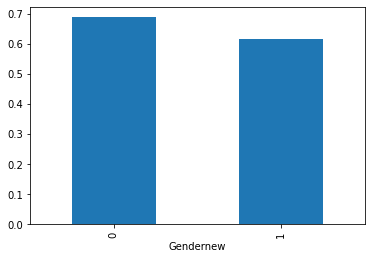

In [1038]:
dataset.groupby(['Gendernew'])["Loan_Status"].mean().plot.bar()

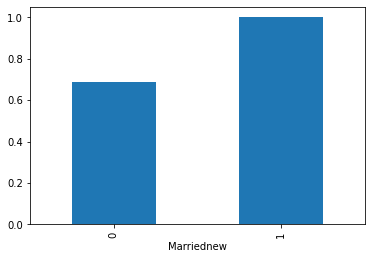

In [1039]:
dataset.groupby(['Marriednew'])["Loan_Status"].mean().plot.bar()

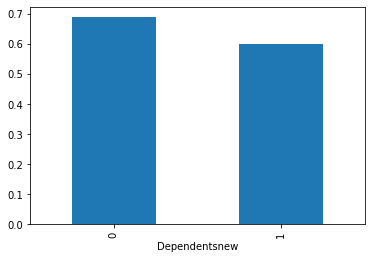

In [1040]:
dataset.groupby(['Dependentsnew'])["Loan_Status"].mean().plot.bar()

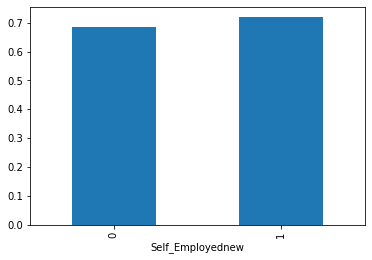

In [1041]:
dataset.groupby(['Self_Employednew'])["Loan_Status"].mean().plot.bar()

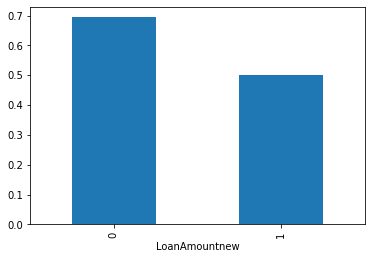

In [1042]:
dataset.groupby(['LoanAmountnew'])["Loan_Status"].mean().plot.bar()

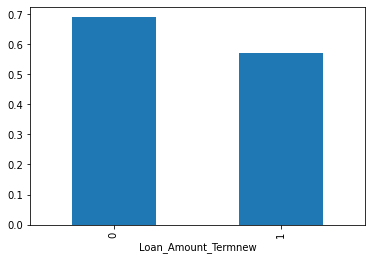

In [1043]:
dataset.groupby(['Loan_Amount_Termnew'])["Loan_Status"].mean().plot.bar()

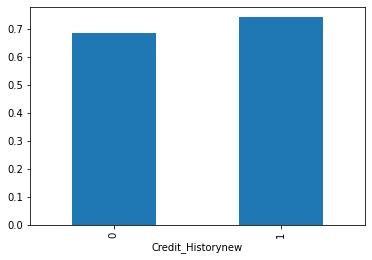

In [1044]:
dataset.groupby(['Credit_Historynew'])["Loan_Status"].mean().plot.bar()

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


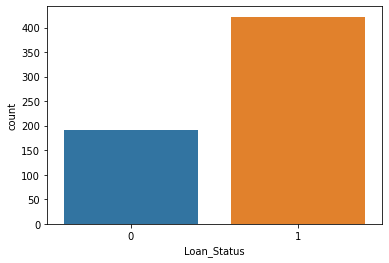

In [1045]:
sns.countplot(dataset["Loan_Status"])

In [1046]:
dataset

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gendernew,Marriednew,Dependentsnew,Educationnew,Self_Employednew,ApplicantIncomenew,CoapplicantIncomenew,LoanAmountnew,Loan_Amount_Termnew,Credit_Historynew,Property_Areanew,Loan_Statusnew
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,0,0,0,0,0,0,0,1,0,0,0,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,0,0,0,0,0,0,0,0,0,0,0,0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,0,0,0,0,0,0,0,0,0,0,0,0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1,0,0,0,0,0,0,0,0,0,0,0,0
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1,0,0,0,0,0,0,0,0,0,0,0,0
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1,0,0,0,0,0,0,0,0,0,0,0,0
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1,0,0,0,0,0,0,0,0,0,0,0,0


In [1047]:
for i in dataset.columns:
  dataset=dataset.drop(dataset.iloc[:,12:],axis=1)

In [1048]:
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [1049]:
dataset.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [1050]:
dataset['Gender'] = dataset["Gender"].fillna(dataset['Gender'].mode()[0])
dataset['Married'] = dataset["Married"].fillna(dataset['Married'].mode()[0])
dataset['Dependents'] = dataset["Dependents"].fillna(dataset['Dependents'].mode()[0])
dataset['Self_Employed'] = dataset["Self_Employed"].fillna(dataset['Self_Employed'].mode()[0])

In [1051]:
dataset['LoanAmount'] = dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean())
dataset['Loan_Amount_Term'] = dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mean())
dataset['Credit_History'] = dataset['Credit_History'].fillna(dataset['Credit_History'].mean())

In [1052]:
dataset.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [1053]:
numeric=["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]
continuous=["ApplicantIncome","CoapplicantIncome","LoanAmount"]

In [1054]:
category=[feature for feature in dataset.columns if dataset[feature].dtypes== "object"]

In [1055]:
category

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [1056]:
for i in category:
  print(i)
  print(dataset[i].value_counts())
  print("----------------------------")

Gender
Male      502
Female    112
Name: Gender, dtype: int64
----------------------------
Married
Yes    401
No     213
Name: Married, dtype: int64
----------------------------
Dependents
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
----------------------------
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
----------------------------
Self_Employed
No     532
Yes     82
Name: Self_Employed, dtype: int64
----------------------------
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
----------------------------


In [1057]:
dataset["Gender"]=np.where(dataset["Gender"]=="Male",1,0)

<IPython.core.display.Javascript object>

In [1058]:
dataset["Married"]=np.where(dataset["Married"]=="Yes",1,0)

<IPython.core.display.Javascript object>

In [1059]:
dataset["Dependents"]=np.where(dataset["Dependents"]=="0",0,1)

<IPython.core.display.Javascript object>

In [1060]:
dataset["Education"]=np.where(dataset["Education"]=="Graduate",1,0)

<IPython.core.display.Javascript object>

In [1061]:
dataset["Self_Employed"]=np.where(dataset["Self_Employed"]=="Yes",1,0)

<IPython.core.display.Javascript object>

In [1062]:
propertyarea=pd.get_dummies(dataset["Property_Area"],drop_first=True)

<IPython.core.display.Javascript object>

In [1063]:
dataset=dataset.drop(["Property_Area"],axis=1)

In [1064]:
dataset=pd.concat([dataset,propertyarea],axis=1)

<IPython.core.display.Javascript object>

In [1065]:
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Semiurban,Urban
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,0,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,0,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,0,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,0,1


In [1066]:
dataset["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [1067]:
for i in continuous:
  dataset[i]=np.log1p(dataset[i])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1068]:
import scipy.stats as stat
import pylab

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

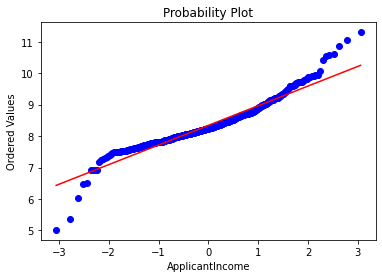

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

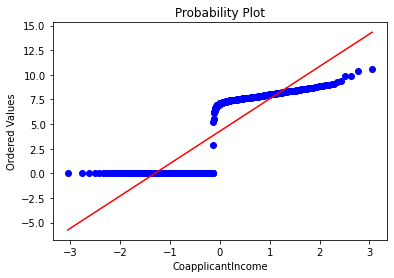

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

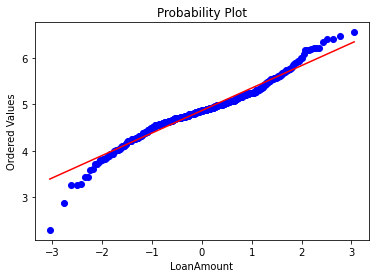

In [1069]:
for i in continuous:
  stats.probplot(dataset[i],plot=pylab)
  plt.xlabel(i)
  plt.show()

In [1070]:
dataset.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Loan_Status            int64
Semiurban              uint8
Urban                  uint8
dtype: object

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

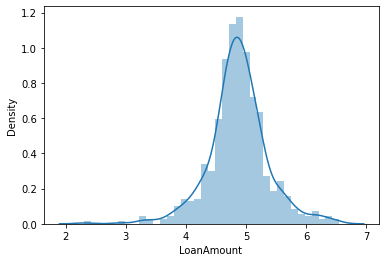

In [1071]:

  sns.distplot(dataset["LoanAmount"])
  plt.xlabel("LoanAmount ")
  plt.show()

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

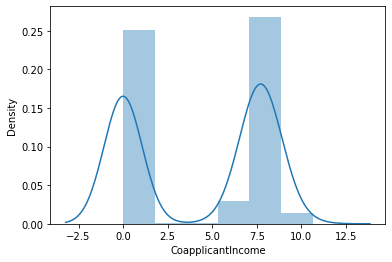

In [1072]:
  sns.distplot(dataset["CoapplicantIncome"])
  plt.xlabel("CoapplicantIncome")
  plt.show()

In [1073]:
dataset["CoapplicantIncome"].unique()

array([ 0.        ,  7.31920246,  7.76599308,  8.34212526,  7.32448998,
        7.82604401,  7.33106031,  9.30282839,  6.55250789,  7.51806418,
        9.00048316,  7.95191138,  6.99117689,  8.16080392,  8.63515399,
        7.55590509,  7.55903826,  7.98139158,  7.72046169,  6.94793707,
        7.6420444 ,  8.12266802,  7.41938058,  8.00670085,  7.63433724,
        7.19368582,  7.28619171,  8.88336292,  7.41997992,  7.10167597,
        7.75662333,  8.14351741,  7.7301748 ,  7.40549566,  7.06304816,
        7.37274637,  7.69666708,  7.71912984,  7.9585769 ,  8.24196656,
        8.14612951,  8.43294164,  7.72090525,  8.02845516,  7.53689713,
        7.4815557 ,  8.4661104 ,  8.01400499,  8.29429961,  7.681099  ,
        7.54009032,  7.83676478,  7.60140233,  7.65869956,  8.33519158,
        7.97281078,  8.64029539,  7.50714108,  7.7419679 ,  6.90575328,
        8.17244682,  8.09070872,  8.24459676,  8.18423477,  6.62671775,
        6.93828448,  7.02731451,  8.18896686,  7.75533881,  8.32

In [1074]:
dataset["CoapplicantIncome"]=np.where(dataset["CoapplicantIncome"]=="-inf",0,dataset["CoapplicantIncome"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

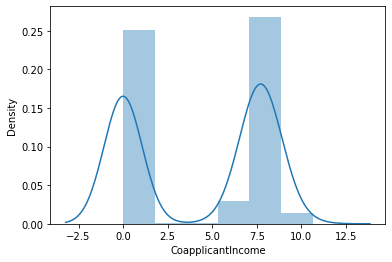

In [1075]:
  sns.distplot(dataset["CoapplicantIncome"])
  plt.xlabel("CoapplicantIncome")
  plt.show()

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

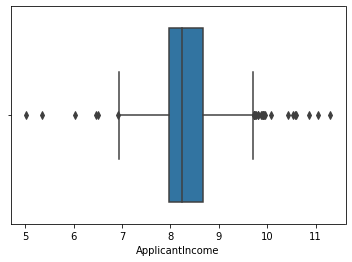

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

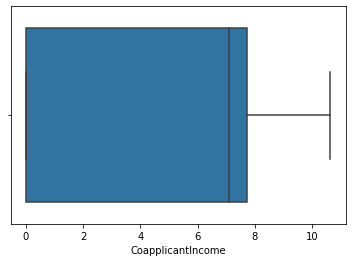

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

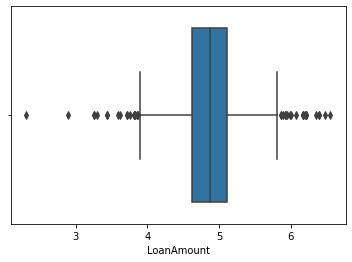

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

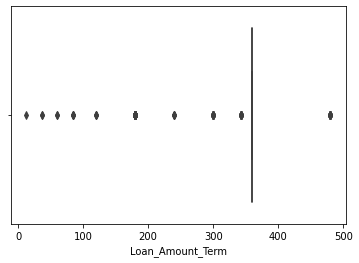

In [1076]:
for i in numeric:
  sns.boxplot(dataset[i])
  plt.show()

In [1077]:
for i in numeric:
  IQR=dataset[i].quantile(0.75)-dataset[i].quantile(0.25)
  lower=dataset[i].quantile(0.25)-(1.5*IQR)
  upper=dataset[i].quantile(0.75)+(1.5*IQR)
  print(i)
  print(upper)
  print(lower)
  print("-----------------")

ApplicantIncome
9.714769169065523
6.915177213877904
-----------------
CoapplicantIncome
19.349742043898722
-11.609845226339234
-----------------
LoanAmount
5.849817637928362
3.878243162766202
-----------------
Loan_Amount_Term
360.0
360.0
-----------------


In [1078]:
for i in numeric:
  dataset.loc[dataset[i]>upper,"i"]=upper
  dataset.loc[dataset[i]<lower,"i"]=lower

In [1079]:
for i in numeric:
  print(i)
  print(dataset[i].value_counts().sort_values())

ApplicantIncome
8.572817    1
9.433564    1
7.730175    1
7.511525    1
8.229244    1
           ..
8.334952    5
7.863651    6
8.699681    6
8.430327    6
7.824446    9
Name: ApplicantIncome, Length: 505, dtype: int64
CoapplicantIncome
8.877242      1
7.765993      1
6.947937      1
8.955577      1
8.146130      1
           ... 
7.755339      3
7.418781      5
7.642044      5
7.824446      5
0.000000    273
Name: CoapplicantIncome, Length: 287, dtype: int64
LoanAmount
5.537334     1
5.525453     1
5.497168     1
4.983607     1
6.347389     1
            ..
5.081404    12
4.615121    15
4.709530    17
4.795791    20
4.993232    22
Name: LoanAmount, Length: 204, dtype: int64
Loan_Amount_Term
12.0       1
60.0       2
36.0       2
120.0      3
240.0      4
84.0       4
300.0     13
342.0     14
480.0     15
180.0     44
360.0    512
Name: Loan_Amount_Term, dtype: int64


In [1080]:
x=dataset.drop(["Loan_Status"],axis=1)
y=dataset["Loan_Status"]

In [1081]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [1082]:
from sklearn.model_selection import RandomizedSearchCV

In [1083]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


In [1084]:
params={"n_estimators":[10,20,30,40,50,100],
         "max_depth":[5,10,15,20,25,30,35]}      
         
         
         
         


In [1085]:
rs=RandomizedSearchCV(model,param_distributions=params,n_iter=10,cv=15,n_jobs=-1,verbose=0,scoring="roc_auc")

In [1086]:
rs.fit(x,y)

RandomizedSearchCV(cv=15, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30,
                                                      35],
                                        'n_estimators': [10, 20, 30, 40, 50,
                                                         100]},
                   scoring='roc_auc')

In [1087]:
rs.best_params_

{'n_estimators': 30, 'max_depth': 30}

In [1088]:
model=RandomForestClassifier(n_estimators= 50, max_depth=15)

In [1089]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [1090]:
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, n_estimators=50)

In [1091]:
ypred=model.predict(x_test)

In [1092]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy%=",accuracy_score(y_test,ypred)*100)

Accuracy%= 77.23577235772358


In [1093]:
print("classification_report=",classification_report(y_test,ypred))

classification_report=               precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123



<IPython.core.display.Javascript object>

AxesSubplot(0.125,0.125;0.62x0.755)


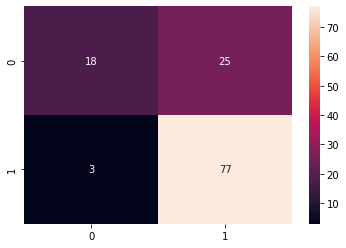

In [1094]:
print(sns.heatmap(confusion_matrix(y_test,ypred),annot=True))

In [1095]:
param={
    "gamma":[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49],
    "max_depth":[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49],
    "n_estimators":[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49],
    "min_child_weight": [0],
    "col_sample_bytree":[10,20,30,5,15,25],
    "learning_rate":[0.1,0.001,0.2,0.3,0.4,0.5]


}

In [1096]:
from xgboost import XGBClassifier

In [1097]:
rsxg=RandomizedSearchCV(XGBClassifier(),param_distributions=param,n_iter=10,cv=15,n_jobs=-1,verbose=0,scoring="roc_auc")

In [1098]:
rsxg.fit(x,y)

RandomizedSearchCV(cv=15, estimator=XGBClassifier(), n_jobs=-1,
                   param_distributions={'col_sample_bytree': [10, 20, 30, 5, 15,
                                                              25],
                                        'gamma': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                  10, 11, 12, 13, 14, 15, 16,
                                                  17, 18, 19, 20, 21, 22, 23,
                                                  24, 25, 26, 27, 28, 29, ...],
                                        'learning_rate': [0.1, 0.001, 0.2, 0.3,
                                                          0.4, 0.5],
                                        'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                      9, 10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
     

In [1099]:
rsxg.best_params_

{'n_estimators': 27,
 'min_child_weight': 0,
 'max_depth': 22,
 'learning_rate': 0.2,
 'gamma': 5,
 'col_sample_bytree': 15}

In [1100]:
xgb=XGBClassifier(n_estimators= 41,
 min_child_weight= 0,
 max_depth= 7,
 learning_rate= 0.1,
 gamma= 30,
 col_sample_bytree=15)

In [1101]:
xgb.fit(x_train,y_train)

XGBClassifier(col_sample_bytree=15, gamma=30, max_depth=7, min_child_weight=0,
              n_estimators=41)

In [1102]:
ypredxgb=xgb.predict(x_test)

In [1103]:
print("Accuracy%=",accuracy_score(y_test,ypredxgb)*100)

Accuracy%= 78.86178861788618


In [1104]:
print("classification_report=",classification_report(y_test,ypredxgb))

classification_report=               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



<IPython.core.display.Javascript object>

AxesSubplot(0.125,0.125;0.62x0.755)


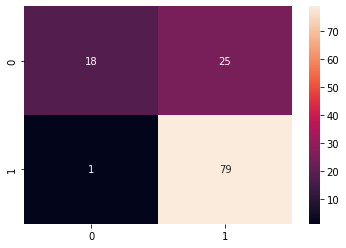

In [1105]:
print(sns.heatmap(confusion_matrix(y_test,ypredxgb),annot=True))